<a href="https://colab.research.google.com/github/MohamedDonia/Mask_detection/blob/master/Face_Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the model to colab directory

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


## Upload photos

In [ ]:
uploaded = files.upload()

Saving image 2 multiple masks.PNG to image 2 multiple masks.PNG


# Load model and images

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = load_model('/content/mask_detector.h5')
img = load_img('/content/one face mask.jpg',
               target_size = (224, 224))
img_arr = img_to_array(img)
image = np.expand_dims(img_arr, axis = 0)
# print shaoe of the image after resizing 
print(image.shape)
# predict the model output 
prediction = model.predict(image)
print(prediction)
if prediction[0][0] > 0.5 :
  print("photo with mask ")
else:
  print("photo without mask ")

(1, 224, 224, 3)
[[0.984426   0.01557402]]
photo with mask 


#Image with multiple faces

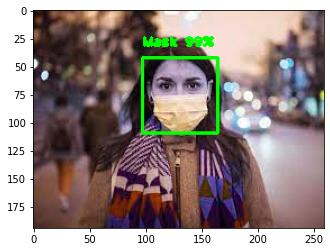

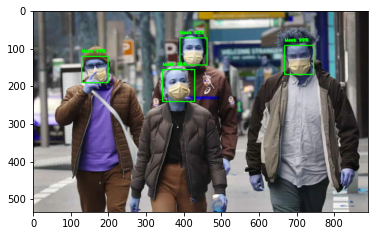

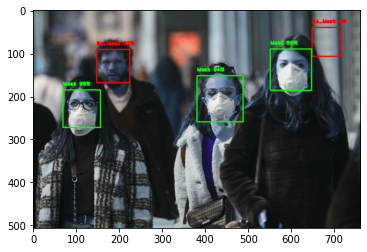

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# one face mask
detect_mask_multi_face('/content/one face mask.jpg')
# all faces are mask
detect_mask_multi_face('/content/multiple face mask.jpg')
# some faces are not masked
detect_mask_multi_face('/content/image 2 multiple masks.PNG')
 

## function to detect mask with different faces

In [ ]:
# function to detect masks
def detect_mask_multi_face(path):
  img = cv2.imread(path)
  # convert image to RGB
  image_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #print(gray.shape)

  # Load the cascade
  face_detect = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  faces = face_detect.detectMultiScale(gray, 
                                     scaleFactor = 1.1, 
                                     minNeighbors = 5)
  #print(faces.shape)

  # draw rectangle around the faces:
  offset = 10
  for (x, y, w, h) in faces:
    new_face = image_RGB[y-offset:y+h+offset, x-offset:x+w+offset]
    face = cv2.resize(new_face, (224, 224))
    #cv2_imshow(face)
    # prepare the pictures :
    face = img_to_array(face)
    face = np.expand_dims(face, axis = 0)
    detection = model.predict(face)
    if detection[0][0] > 0.5:
      prediction = 'Mask'
    else:
      prediction = 'No_Mask'
    # change color of the rectangle:
    color = (0, 255, 0) if prediction == 'Mask' else (255, 0, 0)
    text = prediction +' '+ str(int(detection[0][0]*100)) +'%'
    cv2.putText(img, text, (x, y - offset),
                cv2.FONT_HERSHEY_PLAIN, 0.8, color, 2)
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
  # Display the output
  plt.imshow(img)
  plt.show() 